# MultiClass Classification with Sklearn

In [7]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join('..', 'src')))
sys.setrecursionlimit(20500)
import pandas as pd


from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

'''import helpers'''
import tools as tools

In [8]:
'''import processed data'''
df = pd.read_csv(os.path.abspath(os.path.join('..', 'data/processed/'))+'/data_processed.csv')

In [9]:
df.head(5)

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,text_clean
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"""From a gender perspective, Paulgaard points o...",5,1,8,0.777778,from a gender perspective paulgaard points out...
1,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778,the average figure also masks large difference...
2,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000,the israel oceanographic and limnological rese...
3,10.18356/805b1ae4-en,001180f5dd9a821e651ed51e30d0cf8c,Previous chapters have discussed ways to make ...,2,0,3,1.000000,previous chapters have discussed ways to make ...
4,10.1017/S0008423907070424,00162fc8346ca9cd525d8f87ac2b5352,The “War on Terror” and the Framework of Inter...,16,0,7,1.000000,the war on terror and the framework of interna...


In [18]:
'''split test train'''
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'],
                                                    df['sdg'].values,
                                                    test_size = .15,
                                                    stratify=df['sdg'].values,
                                                    random_state = 1,
                                                    shuffle = True)
print('train size:', len(X_train))
print('test size:', len(X_test))

assert len(set(y_train)) == len(set(y_test)), "Unequal splits with some labels missing"

train size: 17463
test size: 3082


In [19]:
'''extract features using tfidf vecorization:'''
vectorizer = TfidfVectorizer(ngram_range = (1,2),min_df = 0.01, max_df = 0.95)
vect = vectorizer.fit(X_train)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

/Users/jonas/opt/anaconda3/envs/sdg/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 90.0 %
Test accuracy: 84.0 %


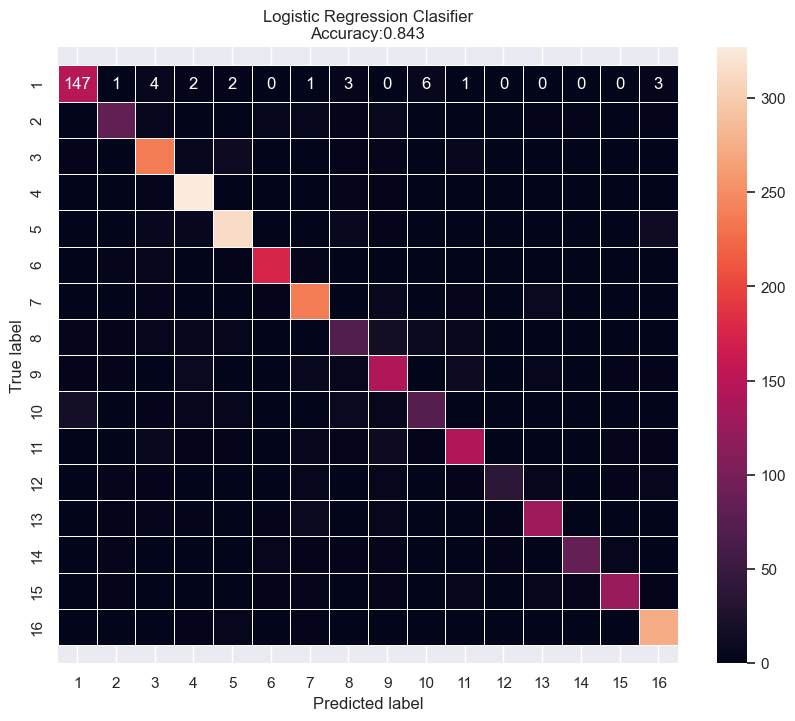

In [20]:
clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', penalty='l2').fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train).round(2)*100, "%")
print('Test accuracy:', clf.score(X_test, y_test).round(2)*100, "%")
y_hat = clf.predict(X_test)
tools.show_labels(y_test, y_hat, title = 'Logistic Regression Clasifier', class_range = (1,17))

In [13]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.83      0.85      0.84       226
           2       0.78      0.74      0.76       152
           3       0.82      0.89      0.85       358
           4       0.90      0.96      0.93       452
           5       0.90      0.90      0.90       467
           6       0.90      0.90      0.90       257
           7       0.84      0.88      0.86       355
           8       0.63      0.52      0.57       166
           9       0.68      0.75      0.71       250
          10       0.77      0.59      0.67       157
          11       0.76      0.78      0.77       245
          12       0.83      0.54      0.66        92
          13       0.80      0.80      0.80       209
          14       0.91      0.73      0.81       143
          15       0.89      0.84      0.86       202
          16       0.89      0.97      0.93       378

    accuracy                           0.84      4109
   macro avg       0.82   

In [21]:
'''check highest predictors to see if model learnt to make sense out of SDGs'''
df_lambda = tools.get_topwords(clf, vectorizer, n = 10, n_models = 16, show_idxmax = True)
print(f'Shape:{df_lambda.shape}')
display(df_lambda)

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'